In [1]:
from formulas_alpha import *

import matplotlib.pyplot as plt


# Homework 2, Question 10

In [2]:
# Parameters
S = 91   # Current stock price
K = 94   # Strike price
T = 0.5  # Time to maturity (0.5 years)
r = 0.04 # Risk-free rate (4%)
sigma = 0.2  # Volatility (20%)

# Calculate option prices and Greeks
call_price = black_scholes(S, K, T, r, sigma, call=True)
put_price = black_scholes(S, K, T, r, sigma, call=False)

call_delta = delta(S, K, T, r, sigma, call=True)
put_delta = delta(S, K, T, r, sigma, call=False)
call_gamma = gamma(S, K, T, r, sigma)
put_gamma = gamma(S, K, T, r, sigma)
call_vega = vega(S, K, T, r, sigma)
put_vega = vega(S, K, T, r, sigma)
call_theta = theta(S, K, T, r, sigma, call=True)
put_theta = theta(S, K, T, r, sigma, call=False)
call_rho = rho(S, K, T, r, sigma, call=True)
put_rho = rho(S, K, T, r, sigma, call=False)

# Display results
print(f"Call Price: {call_price:.2f}")
print(f"Put Price: {put_price:.2f}")
print(f"Call Delta: {call_delta:.4f}")
print(f"Put Delta: {put_delta:.4f}")
print(f"Call Gamma: {call_gamma:.4f}")
print(f"Put Gamma: {put_gamma:.4f}")
print(f"Call Vega: {call_vega:.4f}")
print(f"Put Vega: {put_vega:.4f}")
print(f"Call Theta: {call_theta:.4f}")
print(f"Put Theta: {put_theta:.4f}")
print(f"Call Rho: {call_rho:.4f}")
print(f"Put Rho: {put_rho:.4f}")


Call Price: 4.61
Put Price: 5.75
Call Delta: 0.4931
Put Delta: -0.5069
Call Gamma: 0.0310
Put Gamma: 0.0310
Call Vega: 25.6668
Put Vega: 25.6668
Call Theta: -6.7439
Put Theta: -3.0583
Call Rho: 20.1312
Put Rho: -25.9382


# Homework 2 Question 12

In [3]:
data = np.array([[-2, 4], [-1, 1], [0, 0], [1, 1], [2, 4]])
x_data = data[:, 0]
y_data = data[:, 1]
A = np.column_stack((np.ones_like(x_data), np.exp(x_data), np.exp(-x_data)))
p, _, _, _ = np.linalg.lstsq(A, y_data, rcond=None)
p1, p2, p3 = p
print(f"Coefficients: p1 = {p1:.5f}, p2 = {p2:.5f}, p3 = {p3:.5f}")

Coefficients: p1 = -1.25403, p2 = 0.70066, p3 = 0.70066


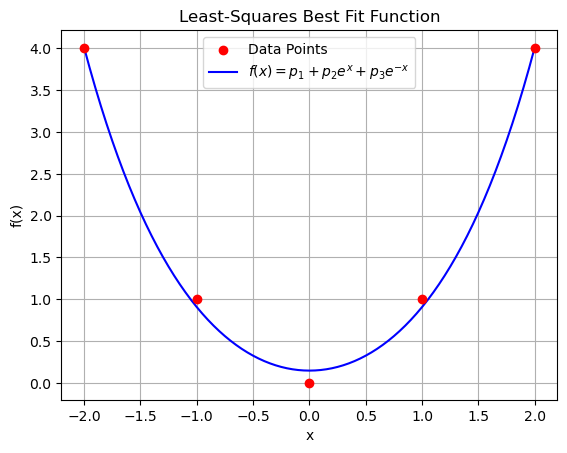

In [4]:
x_plot = np.linspace(min(x_data), max(x_data), 81)

y_plot = p1 + p2 * np.exp(x_plot) + p3 * np.exp(-x_plot)

plt.scatter(x_data, y_data, color='red', label='Data Points', zorder=5)

plt.plot(x_plot, y_plot, label=r'$f(x) = p_1 + p_2 e^x + p_3 e^{-x}$', color='blue')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Least-Squares Best Fit Function')

plt.legend()

plt.grid(True)
plt.show()

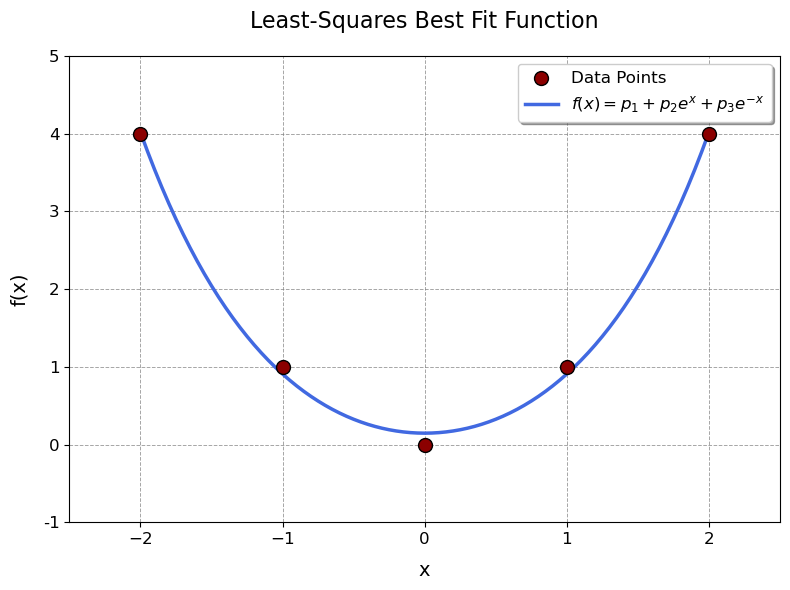

In [5]:
plot_least_squares_fit(x_data, y_data, p1, p2, p3, 81)

In [6]:
import numpy as np
from scipy.interpolate import CubicSpline

# Data from the table
strike_prices = np.array([44.00, 45.00, 46.00, 47.00, 48.00, 49.00, 50.00])
premiums = np.array([3.80, 2.77, 1.77, 0.78, 0.18, 0.03, 0.01])
open_interest = np.array([3260.00, 4499.00, 3862.00, 6271.00, 10156.00, 10619.00, 14219.00])

# Target strike price (ATM)
target_strike = 47.58

# 1. Unweighted Quadratic Regression
unweighted_estimate = unweighted_quadratic_regression(strike_prices, premiums, target_strike)

# 2. Weighted Quadratic Regression
weighted_estimate = weighted_quadratic_regression(strike_prices, premiums, open_interest, target_strike)

# 3. Polynomial Interpolation
polynomial_estimate = polynomial_interpolation(strike_prices, premiums, target_strike)

# 4. Spline Interpolation
spline_estimate = spline_interpolation(strike_prices, premiums, target_strike)

# Print the results
print(f"Unweighted Quadratic Regression Estimate: {unweighted_estimate:.4f}")
print(f"Weighted Quadratic Regression Estimate: {weighted_estimate:.4f}")
print(f"Polynomial Interpolation Estimate: {polynomial_estimate:.4f}")
print(f"Spline Interpolation Estimate: {spline_estimate:.4f}")


Unweighted Quadratic Regression Estimate: 0.5127
Weighted Quadratic Regression Estimate: 0.4672
Polynomial Interpolation Estimate: 0.3695
Spline Interpolation Estimate: 0.3707


In [7]:
# import numpy as np



# # Example usage
# if __name__ == "__main__":
#     # Data
#     x = np.array([44.00, 45.00, 46.00, 47.00, 48.00, 49.00, 50.00])  # Strike prices
#     y = np.array([3.80, 2.77, 1.77, 0.78, 0.18, 0.03, 0.01])          # Premiums
#     w = np.array([3260, 4499, 3862, 6271, 10156, 10619, 14219])       # Open interest
#     S0 = 47.58  # Spot price

#     # Estimate the premium
#     estimate = weighted_quadratic_regression(x, y, w, S0)
#     print(f'Weighted quadratic regression estimate: ${estimate:.2f}')
